## Riemann sums

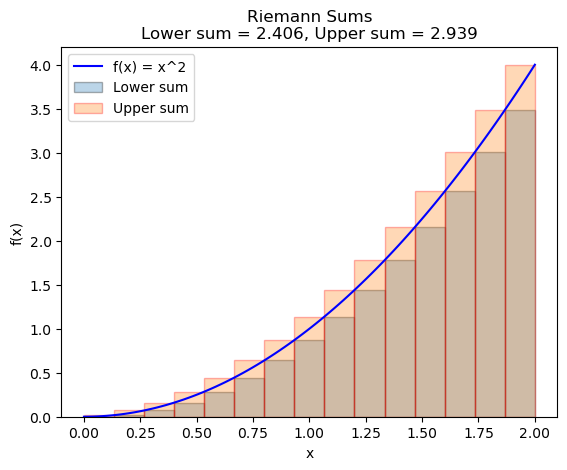

In [14]:
import numpy as np

import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return x**2

# Interval [a, b] and number of subintervals
a, b = 0, 2
n = 15
x = np.linspace(a, b, n+1)
dx = (b - a) / n

# Lower sum (left endpoints)
x_left = x[:-1]
lower_sum = np.sum(f(x_left) * dx)

# Upper sum (right endpoints)
x_right = x[1:]
upper_sum = np.sum(f(x_right) * dx)

# Plotting
X = np.linspace(a, b, 100)
plt.plot(X, f(X), 'b', label='f(x) = x^2')
plt.bar(x_left, f(x_left), width=dx, alpha=0.3, align='edge', edgecolor='k', label='Lower sum')
plt.bar(x_right-dx, f(x_right), width=dx, alpha=0.3, align='edge', edgecolor='r', label='Upper sum')
plt.legend()
plt.title(f'Riemann Sums\nLower sum = {lower_sum:.3f}, Upper sum = {upper_sum:.3f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Numerical Integration: Midpoint, Trapezoid, and Simpson's Rule

When the exact value of a definite integral is difficult or impossible to compute analytically, numerical integration methods can be used to approximate the area under a curve. Three common methods are the **Midpoint Rule**, **Trapezoid Rule**, and **Simpson's Rule**.

#### Midpoint Rule

The midpoint rule approximates the area under a curve by dividing the interval \([a, b]\) into \(n\) subintervals, then using the value of the function at the midpoint of each subinterval to estimate the area of a rectangle covering that segment. The sum of the areas of these rectangles gives the approximation:

$$
\int_a^b f(x)\,dx \approx \sum_{i=1}^n f\left(\frac{x_{i-1} + x_i}{2}\right) \Delta x
$$

where $\Delta x = \frac{b-a}{n}$.

#### Trapezoid Rule

The trapezoid rule approximates the area under the curve by dividing the interval into \(n\) subintervals and approximating the area under the curve in each subinterval by a trapezoid, rather than a rectangle. The sum of the areas of these trapezoids gives the approximation:

$$
\int_a^b f(x)\,dx \approx \frac{\Delta x}{2} \left[ f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]
$$

where $x_0 = a$, $\($x_n = b$, and $x_i$ are the endpoints of the subintervals.

#### Simpson's Rule

Simpson's rule provides a more accurate approximation by fitting parabolas through the points of the function. It requires that the number of subintervals $n$ be even. The approximation is given by:

$$
\int_a^b f(x)\,dx \approx \frac{\Delta x}{3} \left[ f(x_0) + 4\sum_{\text{odd } i} f(x_i) + 2\sum_{\text{even } i} f(x_i) + f(x_n) \right]
$$

Simpson's rule generally provides a better approximation than the midpoint or trapezoid rules for smooth functions.

*Figure: Simpson's Rule approximates the area under the curve by fitting parabolic arcs through the points of the function.*

---




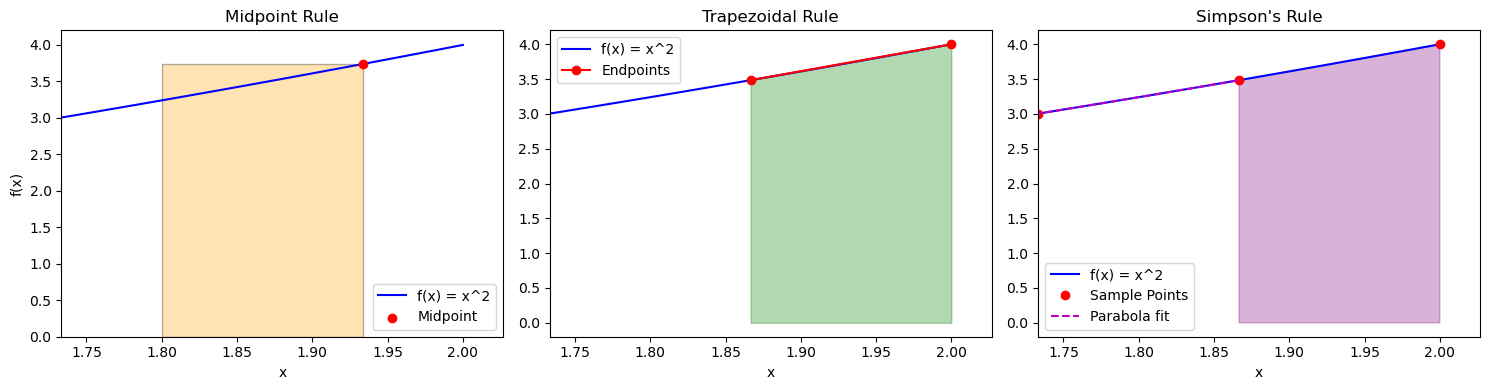

In [15]:
# Visualize where the function is evaluated on the last subinterval for each method

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Midpoint Rule
axs[0].plot(X, f(X), 'b', label='f(x) = x^2')
axs[0].bar(x[i], f(x_mid[i]), width=dx, alpha=0.3, align='center', edgecolor='k', color='orange')
axs[0].scatter(x_mid[i], f(x_mid[i]), color='red', zorder=5, label='Midpoint')
axs[0].set_title('Midpoint Rule')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()

# Trapezoidal Rule
axs[1].plot(X, f(X), 'b', label='f(x) = x^2')
axs[1].plot([x[i], x[i+1]], [f(x[i]), f(x[i+1])], 'ro-', label='Endpoints')
axs[1].fill_between([x[i], x[i+1]], [f(x[i]), f(x[i+1])], color='green', alpha=0.3)
axs[1].set_title('Trapezoidal Rule')
axs[1].set_xlabel('x')
axs[1].legend()

# Simpson's Rule
axs[2].plot(X, f(X), 'b', label='f(x) = x^2')
axs[2].plot([x[i-1], x[i], x[i+1]], [f(x[i-1]), f(x[i]), f(x[i+1])], 'ro', label='Sample Points')
axs[2].plot(x_parabola, y_parabola, 'm--', label='Parabola fit')
axs[2].fill(xs, ys, color='purple', alpha=0.3)
axs[2].set_title("Simpson's Rule")
axs[2].set_xlabel('x')
axs[2].legend()
# Set x-limits to zoom in on the last subinterval for all subplots
for ax in axs:
    ax.set_xlim(x[i] - dx, x[i+1] + dx * 0.2)
plt.tight_layout()
plt.show()

In [16]:
from scipy.integrate import simpson

# Make sure to run the previous cell where x is defined before running this cell

# Midpoint rule
x_mid = (x[:-1] + x[1:]) / 2
midpoint_sum = np.sum(f(x_mid) * dx)

# Trapezoidal rule
trapezoid_sum = np.trapezoid(f(x), x)

# Simpson's rule (requires odd number of intervals)
simpson_sum = simpson(f(x), x)

print(f"Midpoint rule: {midpoint_sum:.5f}")
print(f"Trapezoidal rule: {trapezoid_sum:.5f}")
print(f"Simpson's rule: {simpson_sum:.5f}")

Midpoint rule: 2.66370
Trapezoidal rule: 2.67259
Simpson's rule: 2.66667


**Theory:**
- Each numerical integration rule approximates the definite integral of a function over an interval \([a, b]\) and has a corresponding error term that depends on the derivatives of the function.
- The error formulas are:
    - **Midpoint Rule:** The error is proportional to the second derivative of the function, specifically \(-\frac{(b-a)^3}{24} f''(\xi)\) for some \(\xi \in [a, b]\).
    - **Trapezoidal Rule:** The error is also proportional to the second derivative, given by \(-\frac{(b-a)^3}{12} f''(\xi)\).
    - **Simpson's Rule:** The error depends on the fourth derivative, given by \(-\frac{(b-a)^5}{2880} f^{(4)}(\xi)\).
- In the cell, these error expressions are computed symbolically for the function \(f(x) = x^2\), and then evaluated for the specific interval \([a, b]\).
- For \(f(x) = x^2\), the second derivative is constant (2), and the fourth derivative is zero, so Simpson's rule has zero error for this function.

This demonstrates how the accuracy of each rule depends on the smoothness of the function and the interval size.

### Lagrange Interpolation Remainder Term

When using Lagrange interpolation to approximate a function $f(x)$ by a polynomial $P_n(x)$ of degree $n$ that passes through $n+1$ points, the error (or remainder) at a point $x$ is given by the **Lagrange remainder term**:

$$
R_n(x) = f(x) - P_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n (x - x_i)
$$

where:
- $ x_0, x_1, \ldots, x_n $ are the interpolation nodes,
- $ f^{(n+1)}(\xi) $ is the $(n+1)th$ derivative of $ f $ evaluated at some point $ \xi $ in the interval containing the nodes and $ x $,
- $ (n+1)! $ is the factorial of $ n+1 $.

**Interpretation:**  
The remainder term quantifies the difference between the true function and its interpolating polynomial. It shows that the interpolation error depends on the smoothness of $f$ (through its $(n+1)th$ derivative) and the distance from $x$ to the interpolation nodes. If $f$ is a polynomial of degree at most $n$, the remainder is zero everywhere.

In [12]:
from sympy import symbols, integrate, diff, factorial, lambdify

# Symbolic variable
x_sym = symbols('x')

# Define the function and its derivatives
f_sym = x_sym**2
a_sym, b_sym = symbols('a b')
n_sym = symbols('n', integer=True)

# Midpoint Rule Error: -(b-a)^3 / 24 * f''(ξ)
midpoint_error_expr = -((b_sym - a_sym)**3 / 24) * diff(f_sym, x_sym, 2)
print("Midpoint Rule Error (symbolic):")
display(midpoint_error_expr)

# Trapezoidal Rule Error: -(b-a)^3 / 12 * f''(ξ)
trapezoid_error_expr = -((b_sym - a_sym)**3 / 12) * diff(f_sym, x_sym, 2)
print("Trapezoidal Rule Error (symbolic):")
display(trapezoid_error_expr)

# Simpson's Rule Error: -(b-a)^5 / 2880 * f^{(4)}(ξ)
simpson_error_expr = -((b_sym - a_sym)**5 / 2880) * diff(f_sym, x_sym, 4)
print("Simpson's Rule Error (symbolic):")
display(simpson_error_expr)

# For f(x) = x^2, f''(x) = 2, f^{(4)}(x) = 0
midpoint_error = midpoint_error_expr.subs({diff(f_sym, x_sym, 2): 2, a_sym: a, b_sym: b})
trapezoid_error = trapezoid_error_expr.subs({diff(f_sym, x_sym, 2): 2, a_sym: a, b_sym: b})
simpson_error = simpson_error_expr.subs({diff(f_sym, x_sym, 4): 0, a_sym: a, b_sym: b})

print(f"Midpoint Rule Error for f(x)=x^2 on [{a},{b}]: {midpoint_error}")
print(f"Trapezoidal Rule Error for f(x)=x^2 on [{a},{b}]: {trapezoid_error}")
print(f"Simpson's Rule Error for f(x)=x^2 on [{a},{b}]: {simpson_error}")

Midpoint Rule Error (symbolic):


-(-a + b)**3/12

Trapezoidal Rule Error (symbolic):


-(-a + b)**3/6

Simpson's Rule Error (symbolic):


0

Midpoint Rule Error for f(x)=x^2 on [0,2]: -2/3
Trapezoidal Rule Error for f(x)=x^2 on [0,2]: -4/3
Simpson's Rule Error for f(x)=x^2 on [0,2]: 0


### Gaussian Quadratures

**Gaussian quadrature** is a powerful numerical integration technique that approximates the definite integral of a function, typically over a finite interval, by a weighted sum of function values at specific points (called nodes or abscissas):

$$
\int_a^b f(x)\,dx \approx \sum_{i=1}^n w_i\, f(x_i)
$$

- The nodes $x_i$ and weights $w_i$ are chosen so that the formula is exact for all polynomials of degree up to $2n-1$.
- The most common form is **Gauss-Legendre quadrature**, which integrates over $[-1, 1]$ using roots of Legendre polynomials as nodes.
- For other intervals $[a, b]$, a change of variables is used to map $[a, b]$ to $[-1, 1]$.

#### Key Points:
- **Accuracy:** Gaussian quadrature is much more accurate than Newton-Cotes formulas (like trapezoidal or Simpson's rule) for the same number of points, especially for smooth functions.
- **Nodes and Weights:** Both are precomputed and tabulated for standard cases, or can be computed numerically.
- **Generalization:** Other types (e.g., Gauss-Chebyshev, Gauss-Laguerre, Gauss-Hermite) exist for different weight functions and intervals.

#### Example (2-point Gauss-Legendre quadrature on $[-1, 1]$):

- Nodes: $x_1 = -\frac{1}{\sqrt{3}},\ x_2 = \frac{1}{\sqrt{3}}$
- Weights: $w_1 = w_2 = 1$

So,
$$
\int_{-1}^1 f(x)\,dx \approx f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)
$$

#### Summary

Gaussian quadrature achieves high accuracy with fewer function evaluations by optimally choosing both the nodes and weights, making it especially useful for integrating polynomials and smooth functions.

### Legendre Polynomials

**Legendre polynomials** are a sequence of orthogonal polynomials that arise frequently in physics, engineering, and numerical analysis, especially in the context of solving differential equations and in Gaussian quadrature.

#### Definition

The Legendre polynomials $P_n(x)$ are defined on the interval $[-1, 1]$ and can be generated using the recurrence relation:
$$
P_0(x) = 1,\quad P_1(x) = x
$$
$$
(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
$$

Alternatively, they can be defined by Rodrigues' formula:
$$
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 - 1)^n
$$

#### Properties

- **Orthogonality:** Legendre polynomials are orthogonal with respect to the weight function $w(x) = 1 $ on $[-1, 1]$:
    $$
    \int_{-1}^1 P_n(x) P_m(x) dx = 0 \quad \text{if } n \ne m
    $$
- **Normalization:** $P_n(1) = 1$ for all $ n $.
- **Applications:** They are used in solving Laplace's equation in spherical coordinates, in expansions of functions (Legendre series), and as the basis for Gauss-Legendre quadrature nodes.

#### First Few Legendre Polynomials
$$
\begin{align*}
P_0(x) &= 1 \\
P_1(x) &= x \\
P_2(x) &= \frac{1}{2}(3x^2 - 1) \\
P_3(x) &= \frac{1}{2}(5x^3 - 3x) \\
P_4(x) &= \frac{1}{8}(35x^4 - 30x^2 + 3)
\end{align*}
$$

Legendre polynomials provide optimal nodes for Gaussian quadrature, allowing exact integration of polynomials up to degree \(2n-1\) using \(n\) points.

In [26]:
# Given data
t = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
v = np.array([0, 7.51, 8.10, 8.93, 9.32, 9.76, 10.22, 10.56, 11.01, 11.22, 11.22])

# Trapezoidal rule for numerical integration
distance = np.trapezoid(v, t)
print(f"Estimated distance covered in 5 seconds: {distance:.2f} meters")

Estimated distance covered in 5 seconds: 46.12 meters
